In [1]:
import tensorflow as tf

C:\Users\JinGyu Choi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import ortools

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
a=tf.constant(3.0, dtype=tf.float32)
b=tf.constant(4.0)
total=a+b
print(a)
print(b)
print(total)
print(type(total))

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [49]:
sess=tf.Session()
print(sess.run(a))
print(sess.run(total))

3.0
7.0


In [50]:
sess.close()

In [51]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

z=x+y
print(x,y,z)

Tensor("Placeholder_5:0", dtype=float32) Tensor("Placeholder_6:0", dtype=float32) Tensor("add_6:0", dtype=float32)


In [52]:
sess=tf.Session()

In [10]:
print(sess.run(z, feed_dict={x:3.0 ,y:4.5}))
print(sess.run(z, feed_dict={x:[3,5,4.5], y:[1,9.7,10]}))

7.5
[ 4.  14.7 14.5]


In [11]:
zvalue=z.eval(session=tf.Session(),feed_dict={x:3, y:4.5})
print(zvalue)

7.5


In [12]:
sess.close()

In [13]:
W=tf.Variable([0.2],dtype=tf.float32)
b=tf.Variable([-0.2],dtype=tf.float32)
x=tf.placeholder(tf.float32)

y=W*x+b
sess=tf.Session()

In [14]:
init=tf.global_variables_initializer()
sess.run(init)

In [15]:
print(sess.run(y,feed_dict={x:2}))#initialize 먼저 해야함!

[0.2]


In [16]:
print(W,b)
print(sess.run(W)*sess.run(b))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>
[-0.04]


In [17]:
W=tf.assign(W,[4.0])
b=tf.assign(b,[8.5])
print(sess.run((W,b)))
print(sess.run(y,feed_dict={x:3}))

(array([4.], dtype=float32), array([8.5], dtype=float32))
[20.5]


In [18]:
sess.close()

In [19]:
df=pd.read_csv('regression_data1.csv')
df.head()

,x,y
0,0.431086,0.794687
1,0.676032,0.339175
2,-1.215988,-1.176260
3,0.534917,0.025879
4,-0.256216,-0.435692


In [20]:
X=df.values[:,0]
Y=df.values[:,1]

In [21]:
print(X.shape)

(20,)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=21,test_size=0.25)
print(X_train.shape)

(15,)


In [53]:
W=tf.Variable([0.3],dtype=tf.float32)
b=tf.Variable([-0.2],dtype=tf.float32)

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

linear_model=W*x + b

In [54]:
squared_deltas=tf.square(linear_model-y)
loss=tf.reduce_sum(squared_deltas)

In [55]:
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)

In [56]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [57]:
print('W=', sess.run(W))
print('b=', sess.run(b))
print(loss.eval(session=sess, feed_dict={x:X_train,y:y_train}))

W= [0.3]
b= [-0.2]
2.6862037


In [58]:
for epoch in range(100):
    sess.run(train, feed_dict={
        x:X_train,
        y:y_train
    })
    if(epoch%10==9):
        print("epoch =", epoch)
        print(loss.eval(session=sess, feed_dict={x:X_train, y:y_train}))
        print(sess.run(W))
        print(sess.run(b))
        print()

epoch = 9
1.4446325
[0.5291031]
[0.0242209]

epoch = 19
1.423313
[0.56313676]
[0.0492902]

epoch = 29
1.4229337
[0.56771684]
[0.05257907]

epoch = 39
1.422927
[0.5683283]
[0.05301718]

epoch = 49
1.4229269
[0.56840986]
[0.05307562]

epoch = 59
1.4229269
[0.56842077]
[0.05308342]

epoch = 69
1.4229269
[0.56842226]
[0.05308446]

epoch = 79
1.4229269
[0.5684223]
[0.05308458]

epoch = 89
1.4229269
[0.5684223]
[0.05308458]

epoch = 99
1.4229269
[0.5684223]
[0.05308458]



In [59]:
print(loss.eval(session=sess,feed_dict={x:X_test,y:y_test}))

0.14462306


In [60]:
y_test_pred=linear_model.eval(session=sess,feed_dict={x:X_test})
print(y_test_pred)
print(y_test)

[ 0.4331768   0.8431057  -0.87517047 -0.29272288  0.58336246]
[ 0.14714283  0.87566553 -0.67893383 -0.44000164  0.54402263]


In [61]:
W=sess.run(W)
b=sess.run(b)
print(W,b)

[0.5684223] [0.05308458]


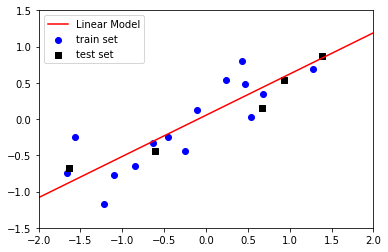

In [62]:
xval=np.linspace(-2,2,101)
yval=W*xval+b

plt.plot(xval,yval,c='r',label='Linear Model')
plt.scatter(X_train,y_train,c='b',marker='o',label='train set')
plt.scatter(X_test,y_test,c='k',marker='s',label='test set')

plt.xlim((-2,2))
plt.ylim((-1.5,1.5))
plt.legend()
plt.show()

In [63]:
sess.close()

In [64]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([[0],[1],[1],[1]])

In [65]:
#tf.truncated_normal?

In [66]:
tf.set_random_seed(1234)
w=tf.Variable(tf.truncated_normal([2,1],seed=0),name='Weights')
b=tf.Variable(tf.zeros([1]),name='Bias')

x=tf.placeholder(tf.float32,shape=[None,2],name='Input')
t=tf.placeholder(tf.float32,shape=[None,1],name='Target')

y=tf.nn.sigmoid(tf.matmul(x,w)+b)

cross_entropy=-tf.reduce_mean(t*tf.log(y)+(1-t)*tf.log(1-y))
optimizer=tf.train.GradientDescentOptimizer(0.01)
train_step=optimizer.minimize(cross_entropy)

correct_prediction=tf.equal(tf.to_float(tf.greater(y,0.5)),t)


In [67]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
print(sess.run(b))

[0.]


In [68]:
# 학습 이전
print("w=",sess.run(w))
print("b=",sess.run(b))
prob=y.eval(session=sess,feed_dict={x:X})
print(prob)
print(sess.run(cross_entropy,feed_dict={x:X,t:Y}))
classfied=correct_prediction.eval(session=sess,feed_dict={x:X,t:Y}) # 0.5보다 크면 true 작으면 false
print(classfied)

w= [[-0.30200204]
 [ 1.9954948 ]]
b= [0.]
[[0.5       ]
 [0.88032323]
 [0.42506817]
 [0.84468293]]
0.46122825
[[ True]
 [ True]
 [False]
 [ True]]


In [69]:
for epoch in range(500):
    sess.run(train_step, feed_dict={
        x:X,
        t:Y
    })
    if epoch%10==0:
        print('eppch=',epoch)
        print(sess.run(cross_entropy,feed_dict={x:X,t:Y}))
        print()

eppch= 0
0.46077168

eppch= 10
0.45630616

eppch= 20
0.45201617

eppch= 30
0.44789195

eppch= 40
0.44392407

eppch= 50
0.44010368

eppch= 60
0.4364228

eppch= 70
0.43287373

eppch= 80
0.4294493

eppch= 90
0.42614284

eppch= 100
0.422948

eppch= 110
0.41985893

eppch= 120
0.41687

eppch= 130
0.41397604

eppch= 140
0.41117224

eppch= 150
0.4084539

eppch= 160
0.40581673

eppch= 170
0.40325668

eppch= 180
0.40076995

eppch= 190
0.39835283

eppch= 200
0.39600196

eppch= 210
0.39371422

eppch= 220
0.39148644

eppch= 230
0.3893159

eppch= 240
0.3871999

eppch= 250
0.38513586

eppch= 260
0.38312134

eppch= 270
0.38115424

eppch= 280
0.37923214

eppch= 290
0.37735337

eppch= 300
0.3755157

eppch= 310
0.37371752

eppch= 320
0.37195706

eppch= 330
0.3702326

eppch= 340
0.36854276

eppch= 350
0.366886

eppch= 360
0.36526096

eppch= 370
0.36366636

eppch= 380
0.36210087

eppch= 390
0.36056337

eppch= 400
0.35905266

eppch= 410
0.35756785

eppch= 420
0.35610783

eppch= 430
0.3546716

eppch= 440
0.3

In [70]:
#학습 후
classified=correct_prediction.eval(session=sess,feed_dict={x:X,t:Y})
print(classified)

[[False]
 [ True]
 [ True]
 [ True]]


In [71]:
sess.close()